## Language Models
Dataset used: Gutenberg corpus first book.

First tokenization commands usage is demonstrated. What is produced is of type 'generator' but can be converted to type list, each entry of which will be of type 'tuple'.

Next the probability of the sentence "It was a" is calculated using unigram, bigram and trigram techniques for comparatative contrast.
For example for bigram estimation:
P(w<sub>i</sub> |w<sub>i-1</sub>)= Count(w<sub>i</sub>,w<sub>i-1</sub>)/Count(w<sub>i-1</sub>)

## How to install NLTK corpus like Gutenberg dataset...

### Step 1: Start the NLTK Interpreter
### Step 2: Type import nltk
### Step 3: Type nltk.download
### Step 4: A new screen entitled "NLTK Downloader" pops up
### Step 5: Choose to install the option " Everything used in NLTK book", then click on "Download" button

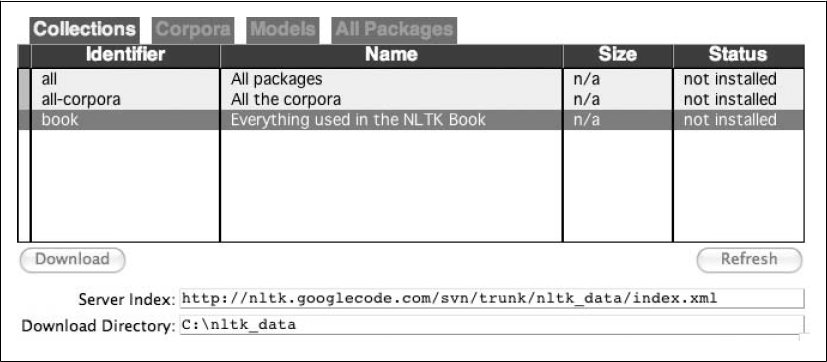

In [1]:
from IPython.display import Image
Image(filename='Data/IPythonDownloader.png')

In [2]:
from nltk.util import ngrams
import nltk
token=nltk.word_tokenize(nltk.corpus.gutenberg.raw(nltk.corpus.gutenberg.fileids()[0]))
#print type(ngrams(token,2))
bigrams=list(ngrams(token,2))
trigrams=list(ngrams(token,3))
print "Length of the bigram list is %d" %(len(bigrams))
print "Length of the trigram list is %d" %(len(trigrams))
print "Type of each bigram entry is %s" %(type(bigrams[0]))

#Now Calculating probability of "It will prove"
#Approach 1 : Unigram 
print "In unigram model Probability of sentence = %f" %(token.count("it")* token.count("was")* token.count("a")/float(len(token)*len(token)*len(token)))
#Approach 2 : Bigram
count1=0
count2=0
for item in bigrams:
  if ("it was" == ' '.join(item)):
      count1=count1+1
  if ("was a" == ' '.join(item)):
      count2=count2+1
print "In bigram model Probability of sentence = %f" %(count1* count2/float(token.count("it")* token.count("was")))
#Approach 3 Trigrams
count2=0
for item in trigrams:
  if ("it was a" == ' '.join(item)):
      count2=count2+1
print "In trigram model Probability of sentence = %f" %(count2/float(count1))
#print trigrams

Length of the bigram list is 191672
Length of the trigram list is 191671
Type of each bigram entry is <type 'tuple'>
In unigram model Probability of sentence = 0.000002
In bigram model Probability of sentence = 0.008280
In trigram model Probability of sentence = 0.078014


## Word Segmentation
Assume you have a speech2text converted utterance. the text obtained<br> 
has no word markersin between. You have to put the marker at correct
places.

Can you give this a try? can you try ro find meanningful words so that 
the sequence given below becomes a meaningful sentence


- "asgregorsamsaawokeonemorningfromuneasydreamshefoundhimself<br>transformedinhisbedintoagiganticinsect"

- "choosespain" - choose spain


### Solution 

- **Define a probabilistic model.** We can’t define all the factors 
(semantic, syntactic, lexical, and social) that make “choose Spain” <br>
a better candidate for a domain name, but we can define a simplified model<br>
that gives approximate probabilities. For short candidates like “choose Spain”<br>
we could just look up the n-gram in the corpus data and use that as the probability.<br>
For longer candidates we will need some way of composing an answer from smaller parts.<br>
For words we haven’t seen before, we’ll have to estimate the probability of an unknown word.<br>
The point is that we define a language model—a probability distribution over all the <br>
strings in the language—and learn the parameters of the model from our corpus data, <br>
then use the model to define the probability of each candidate.

- **Enumerate candidates.** We may not be sure whether “insufficient numbers” or “in sufficient numbers” is more likely to be the intended phrase, but we can agree that they are both candidate segmentations, as is “in suffi cient numb ers,” but that “hello world” is not a valid candidate. In this step we withhold judgment and just enumerate possibilities—all the 
possibilities if we can, or else a carefully selected sample.

- **Choose the most probable candidate.** Apply the language model to each 
candidate to get its probability, and choose the one with the highest 
probability.

$$ best = argmax_{c ∈ candidates}        P(c) $$


#### unigram model
$$ P(W_{1:n} ) = Π_{k=1:n} P(W_{k} ) $$

#### ngram model

$$ P(W_{1:n} ) = Π_{k=1:n} P(W_{k} | W_{1:k–1} ) $$



In [3]:
import re, string, random, glob, operator, heapq
from collections import defaultdict
from math import log10

In [4]:
def product(nums):
    "Return the product of a sequence of numbers."
    return reduce(operator.mul, nums, 1)

class Pdist(dict):
    "A probability distribution estimated from counts in datafile."
    def __init__(self, data=[], N=None, missingfn=None):
        for key,count in data:
            # obtains the count of a  word occurence
            self[key] = self.get(key, 0) + int(count)
        self.N = float(N or sum(self.itervalues()))
        self.missingfn = missingfn or (lambda k, N: 1./N)
    def __call__(self, key): 
        #calculates the probability of the word by dividing by the total occurence
        # when the object of Pdist is called returns the probability value
        if key in self: return self[key]/self.N  
        else: return self.missingfn(key, self.N)

# Generator function, which returns each line as a list wher efirst entry is the word
#Second entry is the count. Basically split by space
def datafile(name, sep='\t'):
    "Read key,value pairs from file."
    for line in file(name):
        yield line.split(sep)

def avoid_long_words(key, N):
    "Estimate the probability of an unknown word."
    return 10./(N * 10**len(key))

# ------------ Execution Starts Here ----------------- #
# The trillion-word data set was published by Thorsten Brants and Alex Franz of Google in 2006

N = 1024908267229 ## Number of tokens

# count_1w.txt has unirams and their occurence (tab separated) in a corpus
# Each word is stored as the word value 
# avoid_long_words is a function (defined above) that does smoothing, i.e.e when a OOV word is found.
Pw  = Pdist(datafile('count_1w.txt'), N, avoid_long_words)

In [5]:
#memoization - python decorator
# does the memoization part i.e. table lookup
def memo(f):
    "Memoize function f."
    table = {}
    def fmemo(*args):
        if args not in table:
            table[args] = f(*args)
        return table[args]
    fmemo.memo = table
    return fmemo

def test(verbose=None):
    """Run some tests, taken from the chapter.
    Since the hillclimbing algorithm is randomized, some tests may fail."""
    import doctest
    print 'Running tests...'
    doctest.testfile('ngrams-test.txt', verbose=verbose)



### Complexity

- Look into the decorator memo used in the cel below as @memo

- Without memo , a call to the funciton segment for an n-character text makes $ 2^{n} $ recursive calls to segment ;
- with memo it makes only n calls— memo makes this a fairly efficient dynamic programming algorithm. Each of the n calls considers O(L) splits, and evaluates each split by multiplying O(n) probabilities, so the whole algorithm is O(n^{2}L).

In [6]:
################ Word Segmentation (p. 223)



@memo
def segment(text):
    "Return a list of words that is the best segmentation of text."
    if not text: return []
    # find the candidates using segment function. 
    candidates = ([first]+segment(rem) for first,rem in splits(text))
    # find the maximum likelihood
    return max(candidates, key=Pwords)

def splits(text, L=20):
    "Return a list of all possible (first, rem) pairs, len(first)<=L."
    return [(text[:i+1], text[i+1:]) 
            for i in range(min(len(text), L))]

def Pwords(words): 
    "The Naive Bayes probability of a sequence of words."
    return product(Pw(w) for w in words)
# Probabiliy of words


print 'the',Pw('the')
print 'hello', Pw('hello')
print 'services', Pw('services')

print segment('choosespain')
# one in 35 trillion segmentations
print segment('wheninthecourseofhumaneventsitbecomesnecessary')

the 0.0225735823407
hello 3.21593473815e-05
services 0.000548543535042
['choose', 'spain']
['when', 'in', 'the', 'course', 'of', 'human', 'events', 'it', 'becomes', 'necessary']


In [7]:
# Bigram model

def cPw(word, prev):
    "Conditional probability of word, given previous word."
    try:
        return P2w[prev + ' ' + word]/float(Pw[prev])
    except KeyError:
        return Pw(word)

P2w = Pdist(datafile('count_2w.txt'), N)

@memo 
def segment2(text, prev='<S>'): 
    "Return (log P(words), words), where words is the best segmentation." 
    # <S> is to handle starting words
    if not text: return 0.0, [] 
    candidates = [combine(log10(cPw(first, prev)), first, segment2(rem, first)) 
                  for first,rem in splits(text)] 
    return max(candidates) 

def combine(Pfirst, first, (Prem, rem)): 
    "Combine first and rem results into one (probability, words) pair." 
    return Pfirst+Prem, [first]+rem

print segment2('wheninthecourseofhumaneventsitbecomesnecessary')
print segment2('asgregorsamsaawokeonemorningfromuneasydreamshefoundhimselftransformed\
inhisbedintoagiganticinsect')

(-24.959286263365577, ['when', 'in', 'the', 'course', 'of', 'human', 'events', 'it', 'becomes', 'necessary'])
(-76.5578290219908, ['as', 'gregor', 'samsa', 'awoke', 'one', 'morning', 'from', 'uneasy', 'dreams', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'gigantic', 'insect'])


### References
Perter Norvigs site http://norvig.com/ngrams/

For any queries/issues please contact Mayank Bhasin mayankbhasin@gmail.com